<a href="https://colab.research.google.com/github/dsevero/generative-models/blob/master/experiments/Bayes-by-Backprop/notebooks/Gaussian_variational_posterior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 1.3MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.3.0
    Uninstalling scipy-1.3.0:
      Successfully uninstalled scipy-1.3.0


In [0]:
from autograd import grad
import autograd.numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import autograd.scipy.stats.norm as norm


sns.set_style('white')
π = np.pi

$$ \mathcal{D}=\left\{x,y\right\}=\left\{\left(x^{(i)}, y^{(i)}\right)\right\}_{i=1}^N$$
$$ x,y \in \mathbb{R}^N $$

$$y = x + 0.3 \sin(2\pi(x + \epsilon)) + 0.3 sin(4\pi(x + \epsilon)) + \epsilon$$

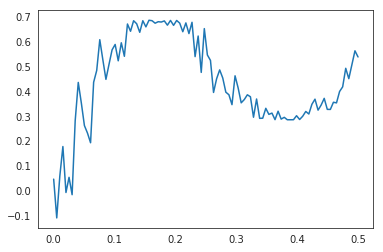

In [11]:
x = np.linspace(0, 0.5, 100)
ϵ = 0.02*np.random.randn(x.shape[0])
y = x + 0.3*np.sin(2*π*(x + ϵ)) + 0.3*np.sin(4*π*(x + ϵ)) + ϵ

plt.plot(x,y);

$$h = \sigma(W_1x + b_1)$$
$$\hat{y} = W_2h + b_2 $$

In [0]:
def relu(z):
    return z*(z > 0)

def init_params(input_size, 
                hidden_layer_size,
                output_size,
                seed=None):
    rs = np.random.RandomState(seed)
    
    W1 = rs.randn(hidden_layer_size, input_size)
    b1 = rs.randn(hidden_layer_size)
    
    W2 = rs.randn(output_size, hidden_layer_size)
    b2 = rs.randn(output_size)
    return W1, b1, W2, b2
    

def neural_net_predict(params, x):
    """Implements a shallow neural network for regression.
       params is a list of (weights, bias) tuples.
       inputs is an (N x D) matrix.
       returns regression results."""
    W1, b1, W2, b2 = params
    h = relu(np.dot(W1, x) + b1)
    y_pred = relu(np.dot(W2, h) + b2)
    return y_pred


def log_likelihood(params, x: float, y: float):
    μ = neural_net_predict(params, x)
    σ = 1
    
    # gaussian model
    return -np.log(np.sqrt(2*π*σ**2)) + np.power(y - μ, 2)/(2*σ)

def loss(params, x: np.array, y: np.array):
    return -log_likelihood(params, x, y).sum()

# Learning

2184 -1.0009983664648276e+20


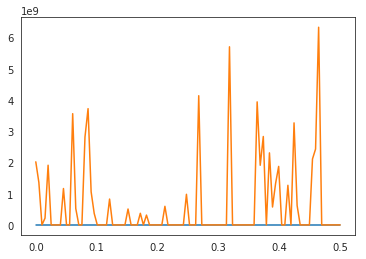

In [145]:
input_size = x.shape[0]
hidden_layer_size = 2
output_size = y.shape[0]
lr = 0.01

# compute gradient
loss_grad = grad(loss)

# init params
params = init_params(input_size, hidden_layer_size, output_size, seed=0)

# Gradient Descent
i = 0
l = 0 
while (i < 10_000) and (l > -1e20):
    Δparams  = loss_grad(params, x, y)   
    params = [p - Δp*lr for p, Δp in zip(params, Δparams)]
    
    l = loss(params, x, y)
    i += 1
print(i, l)

y_pred = neural_net_predict(params, x)
plt.plot(x,y)
plt.plot(x,y_pred)